# RandRad de Co en Mix Pt Pd Co: prueba 2

In [1]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import myfuncions.randomize_f as ranf
import myfuncions.tools_f as tools
import subprocess as sbp

coords = cs.cubeShell(14,2.775,'fcc')
coords = cs.sphericalShave(coords,25)
#Pt 28%, Pd 45% y Co 27%
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList, mode = ranf.cambiar_elementos_prob(atpos,{'Pt':0.38, 'Pd':0.62})
print(mode)
atpos, eleList, mode = ranf.pow_rad_ch(atpos, eleList, {'Pt':0.28, 'Pd':0.45, 'Co':0.27},50, 'Co', inverse = False)
print(mode)
tools.show_percent(atpos,eleList)

name='Mix-co-radrand2.xyz'
tools.wXYZ(atpos,name)

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

Cambia elementos prob a atpos
rand
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 2.7037037037037033
pow
atomos totales : 4321
Pd : 46.79472344364731 %, 2022
Pt : 27.285350613283963 %, 1179
Co : 25.919925943068733 %, 1120


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Mix-co-radrand2.xyz'], returncode=0)

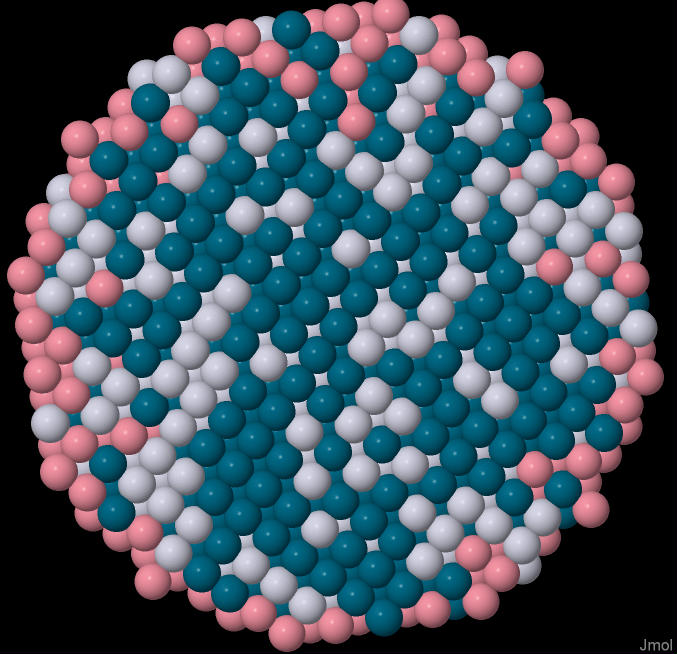

In [2]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

Mix-co-radrand2.ini


In [3]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 100 {name[:-4]}_d.xyz
 run		600
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cambia etiquetas a "atpos"
jala


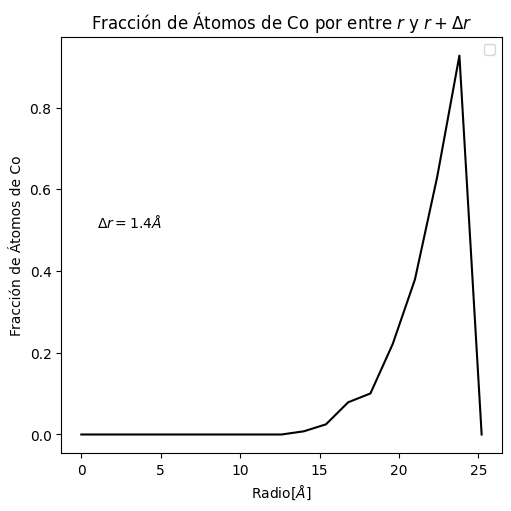

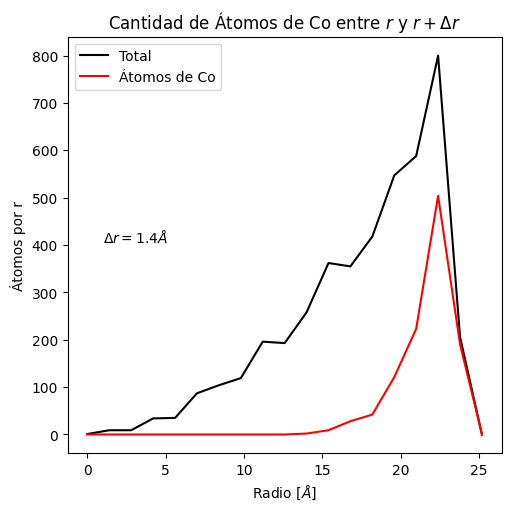

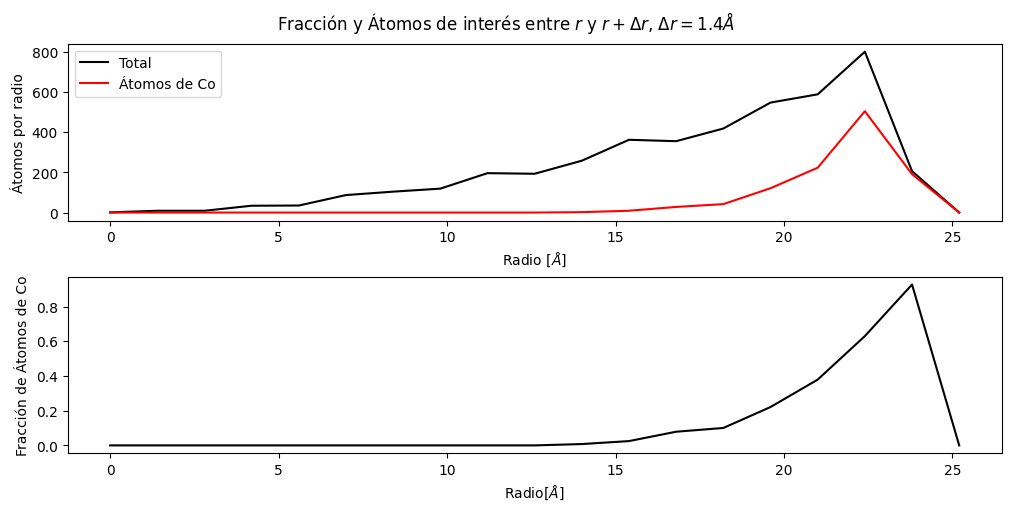

In [4]:
import myfuncions.graphs_f as gf
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})

gf.dump_graficar_fracc_atpr(datpos,'Co',1.4)
gf.dump_graficar_atpr(datpos,'Co',1.4)
gf.plot_dump_f_y_atpr(datpos,'Co',1.4)

In [5]:
tools.wXYZ(datpos,f'{name[:-4]}_d2.xyz')
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d.xyz'])
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d2.xyz'])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'Mix-co-radrand2_d2.xyz'], returncode=0)

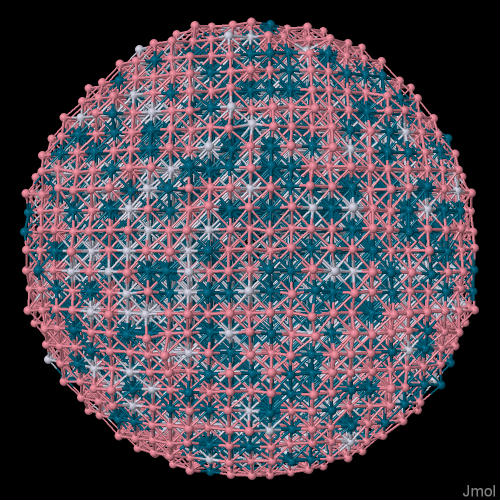

In [6]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d2.xyz', dir_actual, 2600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\04_12_2024_random_dist_2\randrad2_co

        4321  atomos      9333360  pares 
 Rango de distancias    2.17313528     -   48.7142715    
 Distancias promedio    25.1744022    
 Factor de normalizacion    454976.438    



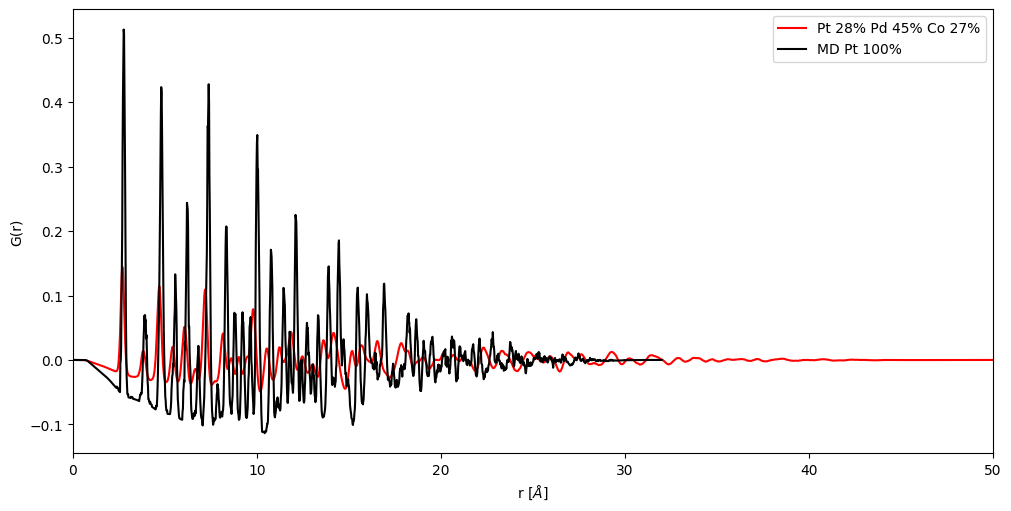

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv(f'{name[:-4]}_d2.txt', sep='\s+')
df_ref = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/03_15_2024_Pt_Ni_rand_dist/Pt_100/Pt-FCC_d.txt', sep = '\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='Pt 28% Pd 45% Co 27%', color = 'red')
ax.plot(df_ref['#r(A)'],df_ref['G(r)'], label = 'MD Pt 100%', color = 'black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,50])
ax.set_ylabel('G(r)')
#ax.set_title('PDF distribución radial aleatoria: Pt 25% Ni 75%')
#ax.grid('True', linestyle='-')
ax.legend()
plt.show()